In [1]:
import requests
import pandas as pd
my_key_variable = '290c4b1c7112bc7ca01c93d1f5b93fe905d2bfe0'
 
url = 'https://api.census.gov/data/2017/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key={}'.format(my_key_variable)
 
response = requests.get(url)

df = pd.DataFrame(response.json())

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

This is a temporary code block, I made it so I wouldn't have to keep rerunning the API request to refresh my data every time I f*** up the data frame. Then I checked to see what the original shape looked like.

In [2]:
Data = df
Data.shape

(72326, 32)

This block is for pulling only the columns I wanted.

In [3]:
# List of original columns
# 'GEO_ID', 'NAME', 'NAICS2017', 'NAICS2017_LABEL', 'SEX', 'SEX_LABEL',
# 'ETH_GROUP', 'ETH_GROUP_LABEL', 'RACE_GROUP', 'RACE_GROUP_LABEL',
# 'VET_GROUP', 'VET_GROUP_LABEL', 'EMPSZFI', 'EMPSZFI_LABEL', 'YEAR',
# 'FIRMPDEMP', 'FIRMPDEMP_F', 'RCPPDEMP', 'RCPPDEMP_F', 'EMP', 'EMP_F',
# 'PAYANN', 'PAYANN_F', 'FIRMPDEMP_S', 'FIRMPDEMP_S_F', 'RCPPDEMP_S',
# 'RCPPDEMP_S_F', 'EMP_S', 'EMP_S_F', 'PAYANN_S', 'PAYANN_S_F', 'us'

table = Data[['NAICS2017_LABEL','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','EMPSZFI_LABEL','FIRMPDEMP','RCPPDEMP','EMP','PAYANN']]
table.shape

(72326, 10)

Filtered the dataframe to only look at the total data for each Firm Size. You can see the rows dropped to only have one entry for each of the 10 firm sizes.

In [4]:
table = table[table['NAICS2017_LABEL'] == 'Total for all sectors']
table = table[table['SEX_LABEL'] == 'Total']
table = table[table['ETH_GROUP_LABEL'] == 'Total']
table = table[table['RACE_GROUP_LABEL'] == 'Total']
table = table[table['VET_GROUP_LABEL'] == 'Total']
table.shape

(10, 10)

1. Seperated the "string" columns, and changed the datatypes for the "number" columns to float. I stored the "string" column and "number" column into different dataframes, then added the "string" column to the "numbers" dataframe. I might've did more code than I needed to, but I was running into a lot of errors and this was the only way I could get it to work.

2. Filtered out the "All firms" row, then created an "Average_Revenue" column that divides the total revenue by the number of firms for each firm size category.

In [5]:
# 1
businessSize = table['EMPSZFI_LABEL']
businessNums = table[['FIRMPDEMP','RCPPDEMP','EMP','PAYANN']].astype('float')
businessNums['EMPSZFI_LABEL'] = businessSize

# 2
business = businessNums[businessNums['EMPSZFI_LABEL'] != 'All firms']
business['Average_Revenue'] = business['RCPPDEMP']/business['FIRMPDEMP']
business.head(10)

C:\Users\temes\AppData\Local\Temp\ipykernel_16188\4292409199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business['Average_Revenue'] = business['RCPPDEMP']/business['FIRMPDEMP']


,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,EMPSZFI_LABEL,Average_Revenue
42,591329.0,2.464916e+08,0.0,3.226306e+07,Firms with no employees,4.168434e+02
43,2934409.0,1.246892e+09,5737290.0,2.104015e+08,Firms with 1 to 4 employees,4.249210e+02
44,956312.0,1.227386e+09,6299539.0,2.385639e+08,Firms with 5 to 9 employees,1.283457e+03
45,611858.0,1.526806e+09,8228901.0,3.199981e+08,Firms with 10 to 19 employees,2.495360e+03
46,409422.0,2.360975e+09,12314188.0,5.023726e+08,Firms with 20 to 49 employees,5.766605e+03
47,128418.0,1.948598e+09,8817581.0,3.985723e+08,Firms with 50 to 99 employees,1.517387e+04
48,70833.0,2.682542e+09,10732919.0,5.217303e+08,Firms with 100 to 249 employees,3.787136e+04
49,21646.0,1.907611e+09,7453703.0,3.836787e+08,Firms with 250 to 499 employees,8.812765e+04
50,20416.0,2.343227e+10,68154153.0,3.926691e+09,Firms with 500 employees or more,1.147741e+06


Created Chart1

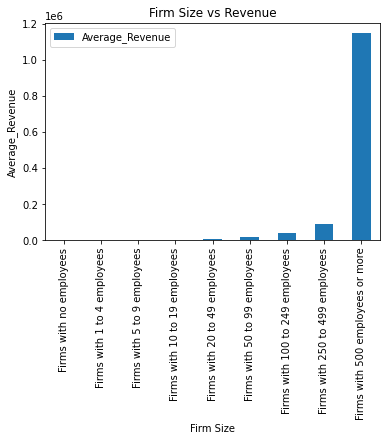

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = business.plot(title = 'Firm Size vs Revenue',kind='bar',x='EMPSZFI_LABEL',y='Average_Revenue')
ax.set_xlabel('Firm Size')
ax.set_ylabel('Average_Revenue')
plt.show()

1. Removed the "Firms with no employees" row, so it wouldn't mess up the formula for the "Average_Payroll" column

2. Created an "Average_Payroll" column by dividing the annual payroll by the number of employees for each firm size category

In [7]:
# 1
business2 = business[business['EMPSZFI_LABEL'] != 'Firms with no employees']

# 2
business2['Average_Payroll'] = business2['PAYANN']/business['EMP']
business2.head(10)

C:\Users\temes\AppData\Local\Temp\ipykernel_16188\3940597578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business2['Average_Payroll'] = business2['PAYANN']/business['EMP']


,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,EMPSZFI_LABEL,Average_Revenue,Average_Payroll
43,2934409.0,1.246892e+09,5737290.0,2.104015e+08,Firms with 1 to 4 employees,4.249210e+02,36.672627
44,956312.0,1.227386e+09,6299539.0,2.385639e+08,Firms with 5 to 9 employees,1.283457e+03,37.870059
45,611858.0,1.526806e+09,8228901.0,3.199981e+08,Firms with 10 to 19 employees,2.495360e+03,38.887099
46,409422.0,2.360975e+09,12314188.0,5.023726e+08,Firms with 20 to 49 employees,5.766605e+03,40.796246
47,128418.0,1.948598e+09,8817581.0,3.985723e+08,Firms with 50 to 99 employees,1.517387e+04,45.202004
48,70833.0,2.682542e+09,10732919.0,5.217303e+08,Firms with 100 to 249 employees,3.787136e+04,48.610287
49,21646.0,1.907611e+09,7453703.0,3.836787e+08,Firms with 250 to 499 employees,8.812765e+04,51.474906
50,20416.0,2.343227e+10,68154153.0,3.926691e+09,Firms with 500 employees or more,1.147741e+06,57.614840


Created Chart2

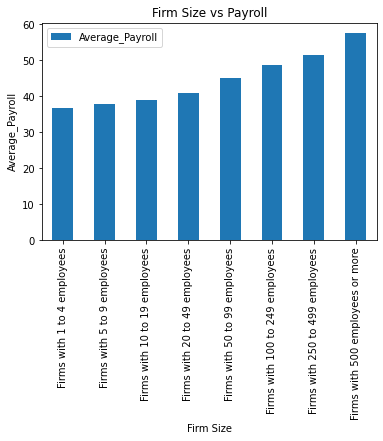

In [8]:
ax = business2.plot(title = 'Firm Size vs Payroll',kind='bar',x='EMPSZFI_LABEL',y='Average_Payroll')
ax.set_xlabel('Firm Size')
ax.set_ylabel('Average_Payroll')
plt.show()